## Importing necessary libraries

In [1]:
import pandas as pd                                                                                              # Importing pandas for data manipulation
import numpy as np                                                                                               # Importing numpy for numerical operations
import matplotlib.pyplot as plt                                                                                  # Importing matplotlib.pyplot for plotting
import seaborn as sns                                                                                            # Importing seaborn for data visualization
from sklearn.preprocessing import RobustScaler                                                                   # For scaling features while handling outliers
from sklearn.model_selection import train_test_split                                                             # Importing train_test_split for splitting data
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, log_loss                      # Importing metrics for model evaluation
from sklearn.datasets import load_breast_cancer                                                                  # Importing breast cancer dataset from sklearn
from sklearn.neural_network import MLPClassifier                                                                 # Importing MLPClassifier for neural network models

## Loading the Breast Cancer Dataset

In [3]:
# Loading the breast cancer dataset
data = load_breast_cancer()                                                                                      # Load the breast cancer dataset from scikit-learn (Reference:sklearn.datasets.load_breast_cancer https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
bcancer_df = pd.DataFrame(data.data, columns=data.feature_names)                                                 # Create a pandas DataFrame from the loaded data (Reference: pandas.DataFrame constructor https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
bcancer_df['target'] = data.target                                                                               # Add the target variable as a separate column in the DataFrame

In [4]:
# Displaying the last 5 rows of the dataset
bcancer_df.tail()                                                                                                # Display the last 5 rows of the DataFrame (using head method from pandas)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


## Data Exploration

In [6]:
# Shape of the dataset
bcancer_df.shape                                                                                                 # Display the shape (number of rows and columns) of the DataFrame using the shape attribute

(569, 31)

In [7]:
# Displaying feature names and                                                                                   #Feature Names of the breast cancer dataset is displayed target names
print("Feature names:", data.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print("Target names:", data.target_names)                                                                       #Target Names of the breast cancer dataset is displayed

Target names: ['malignant' 'benign']


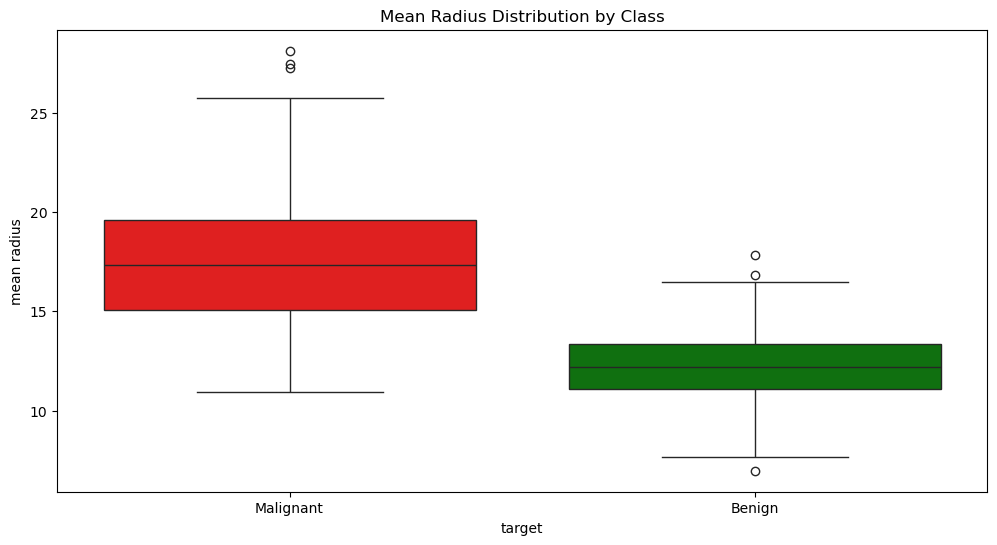

In [9]:
plt.figure(figsize=(12,6))                                                                                                       # Set the figure size for better visualization
sns.boxplot(                                                                                                                     # Create a boxplot to visualize the distribution of 'mean radius' for each class in the dataset
    x='target',                                                                                                                  # X-axis represents the target variable (class labels)
    y='mean radius',                                                                                                             # Y-axis represents the feature being analyzed
    data=bcancer_df,                                                                                                             # Dataset containing the values
    hue='target',                                                                                                                # Differentiate classes using color
    palette=['red', 'green'],                                                                                                    # Define custom colors for classes (red for Malignant, green for Benign)
    legend=False                                                                                                                 # Disable automatic legend display
)                 
plt.xticks([0, 1], ['Malignant', 'Benign'])                                                                                      # Customize X-axis tick labels to represent class names instead of numeric values
plt.title("Mean Radius Distribution by Class")                                                                                   # Set the title for the plot
plt.show()                                                                                                                       # Display the plot


## Data Preprocessing

In [11]:
scaler = RobustScaler()                                                                                                 # Initialize the RobustScaler to normalize the dataset while being resistant to outliers
df_scaled = pd.DataFrame(                                                                                               # Apply the scaler to all feature columns (excluding the target variable)
    scaler.fit_transform(bcancer_df.iloc[:, :-1]),                                                                      # Fit and transform the feature columns
    columns=bcancer_df.columns[:-1]                                                                                     # Retain original column names for clarity
)
df_scaled['target'] = bcancer_df['target']                                                                              # Add the target column back to the scaled dataframe to keep class labels

In [12]:
# Splitting the data into features and target variable                                                          # In machine learning, it's common practice to separate the data into features (X) and the target variable (y).Features represent the independent variables used to predict the target variable, which is the dependent variable we're trying to learn or predict.
X = bcancer_df.drop(columns=["target"])                                                                         # Drop the 'target' column from the DataFrame for feature set(reference: pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
y = bcancer_df['target']                                                                                        # Assign the 'target' column to the target variable (y)

## Train and Test Split

In [14]:
# Splitting the data into training and testing sets                                                                   # This line splits the data (features 'X' and target labels 'y') into training and testing sets using 'train_test_split' from scikit-learn.# Reference: scikit-learn train_test_split documentation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)                             #Here, 30% is allocated for testing data ('test_size=0.2') and the remaining 80% for training. The 'random_state=42' ensures reproducibility if you re-run this code.The resulting variables hold the split data: X_train, X_test, y_train, y_test.

## Model Instantiation of MLP Classifier with ReLU activation function and Model Training

In [16]:
# Initializing MLPClassifier with ReLU activation function                                                     # Initialize Multi-layer Perceptron (MLP) classifier with ReLU activation (Reference: MLPClassifier class https://scikit-learn.org/stable/modules/generated/sklearn.neural_networks.MLPClassifier.html)
mlp_relu = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)      # This line creates an instance of the MLPClassifier class (`mlp_relu`) for multi-layer perceptron classification. The `hidden_layer_sizes` parameter defines a network architecture with two hidden layers, the first with 100 neurons and the second with 50 neurons. The `activation` parameter sets the activation function for all neurons in the hidden layers to 'relu' (Rectified Linear Unit). The `max_iter` parameter controls the maximum number of training iterations (epochs) to prevent overfitting. The `random_state` parameter sets a seed for random number generation to ensure reproducibility of results
mlp_relu.fit(X_train, y_train)                                                                                 # Train the MLP model on scaled training features (X_train_scaled) and target labels (y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

## Predictions for Training and Testing Data - Verification

In [24]:
# Predicting training data using the trained MLP                                                               # Calculate training accuracy using scikit-learn's accuracy_score function.Reference: accuracy_score function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
y_train_pred_relu = mlp_relu.predict(X_train)                                                                   # Predicting on training data using X_train_scaled

In [29]:
# Printing training accuracy for MLP with ReLU activation function                                             # Calculate training accuracy using scikit-learn's accuracy_score function.Reference: accuracy_score function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
print("Training Accuracy (ReLU):", format(accuracy_score(y_train, y_train_pred_relu), ".3f"))                  # Printing training accuracy (relu)

Training Accuracy (ReLU): 0.922


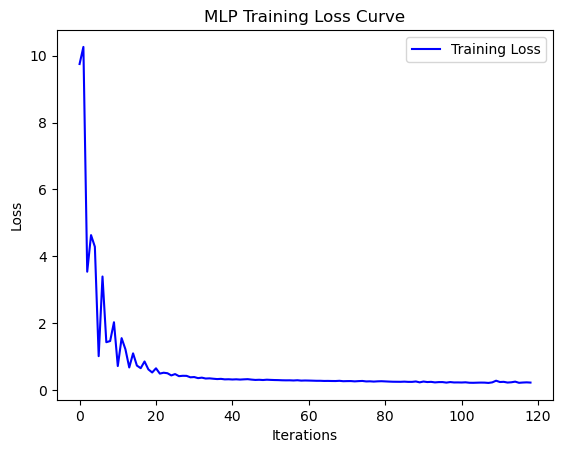

In [31]:
plt.plot(mlp_relu.loss_curve_, label="Training Loss", color="blue")                                                        # Plot the training loss curve for the MLP model using ReLU activation
plt.xlabel("Iterations")                                                                                                   # Label the x-axis to indicate the number of iterations (epochs)
plt.ylabel("Loss")                                                                                                         # Label the y-axis to represent the loss value
plt.title("MLP Training Loss Curve")                                                                                       # Set the title of the plot
plt.legend()                                                                                                               # Add a legend to indicate what the plotted line represents
plt.show()                                                                                                                 # Display the plot

In [35]:
# Calculating and printing the testing accuracy of MLP with relu activation function
y_pred_relu = mlp_relu.predict(X_test)                                                                                  # This line uses the trained  (mlp_relu) to predict class labels for the unseen data points in 'X_test_class_scaled'. These predicted labels represent the model's classification on the test set.
accuracy_relu = accuracy_score(y_test, y_pred_relu)                                                                     # Calculate testing accuracy using scikit-learn's accuracy_score function.Reference: accuracy_score function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
print(f"Testing Accuracy (ReLU): {accuracy_relu:.3f}")                                                                  # Predicted labels for the unseen test data (y_test) to determine the testing accuracy.Print the testing accuracy with 3 decimal places of MLP ReLU Activation

Testing Accuracy (ReLU): 0.959


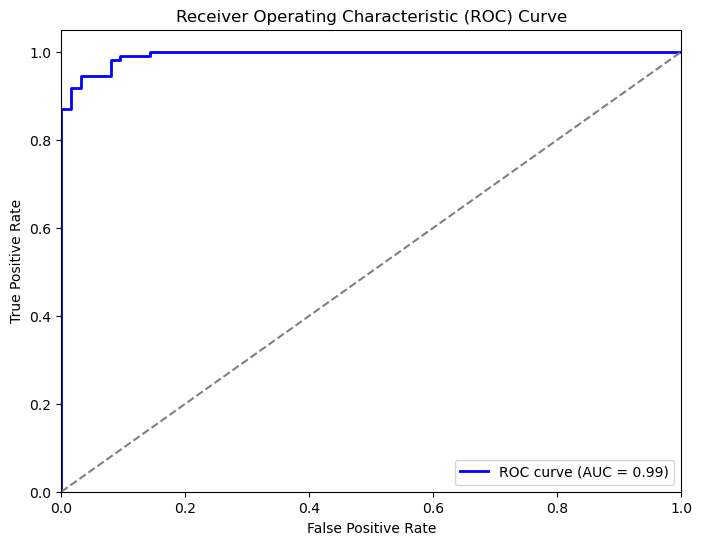

In [37]:
y_probs = mlp_relu.predict_proba(X_test)[:, 1]                                                                           # Extract probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)                                                                                 # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
roc_auc = auc(fpr, tpr)                                                                                                  # Compute the Area Under the Curve (AUC) score


# Plot ROC Curve
plt.figure(figsize=(8, 6))                                                                                               # Create a figure for the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')                                         # Plot the ROC curve with AUC value
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')                                                                   # Plot the diagonal reference line representing a random classifier
plt.xlim([0.0, 1.0])                                                                                                     # X-axis (False Positive Rate) from 0 to 1
plt.ylim([0.0, 1.05])                                                                                                    # Y-axis (True Positive Rate) slightly above 1 for better visualization
# Label the axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Set the title of the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')     
# Add a legend in the lower right corner
plt.legend(loc='lower right')
plt.show()                                                                                                               # Display the plot

## Classification Report

In [40]:
# Printing classification report for MLP with relu activation function
print("\nMLP with ReLU activation - Classification Report:")                                                      # Print classification report (Reference: classification_report function https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
print(classification_report(y_test, y_pred_relu))                                                                 # Evaluate MLP classification with ReLU activation function model performance on unseen data (test set) using classification report.This line prints detailed evaluation metrics (precision, recall, F1-score) for each class.


MLP with ReLU activation - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

